In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
yolo = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg") #using yolov4 config files & Weights
classes = []
tot={}
csv_column='filename' #initializing columns name for csv
with open("coco.names","r") as file:
    classes = [line.strip() for line in file.readlines()]
    for i in classes:
        csv_column=csv_column+','+i 
        tot[i]=0
    csv_column=csv_column+','+'total_count'

#print(csv_column)

#writing column names to csv
bill=open('data.csv','w')
bill.write(csv_column)
bill.close()

In [7]:
layer_names = yolo.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in yolo.getUnconnectedOutLayers()]
colorRed   = (255, 0, 0)
colorGreen = (0, 255, 0)

# Run Object Detection on Whole DataSet Images

Data set Link: https://public.roboflow.com/object-detection/self-driving-car

In [9]:
import sys
import os
path="dataset/"    #  <--- change path here
filenames = next(os.walk(path))[2] #give the path of the image
wz=0

for f in filenames:
    
        
    total=0            #to count total objects
    img = cv2.imread(path+f)
    height, width, channels = img.shape
    
    key={}
    with open("coco.names","r") as file:
        classes = [line.strip() for line in file.readlines()]
        for i in classes:
            key[i]=0       #initialize each count with zero

    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if (confidence > 0.5):
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    import sys,json
    for i in range(len(boxes)):
        if i in indices:
            x, y, w, h = boxes[i]
            try:
                #print("The entry is")
                label =str(classes[class_ids[i]])

            except:
                print("Oops!", sys.exc_info()[0], "occurred.")
                break

            start = (x,y)
            end = (x+w,y+h)
            cv2.rectangle(img, start, end, (0,255,0), 4)
            cv2.putText(img, label, (x,y-20), cv2.FONT_HERSHEY_PLAIN, 5, colorRed, 4)
            #print(label)
            for i in classes:
                if label==i:
                    #print(label,i)
                    key[label]=key[label]+1
                    tot[label]=tot[label]+1
                    total=total+1

    print('\n filename : '+f)    
    csv_row=f   #filename
    for i in classes:
        csv_row=csv_row+','+str(key[i])        #writing value of object counts in the rows
        

        if key[i]>0:         #shows the object counts
            print(i+' : '+str(key[i]))
    csv_row=csv_row+','+str(total)
    print("total objects : "+str(total))
    bill=open('data.csv','a+')
    bill.write("\n"+csv_row)
    bill.close()

csv_tot="total"
for i in classes:
        csv_tot=csv_tot+','+str(tot[i])
bill=open('data.csv','a+')
bill.write("\n"+csv_tot)
bill.close()        
           
 



 filename : 1478019984182279255.jpg
person : 1
car : 1
truck : 1
total objects : 3

 filename : 1478020202188709849.jpg
total objects : 0

 filename : 1478020211690815798.jpg
car : 3
traffic light : 4
total objects : 7

 filename : 1478020213196446056.jpg
car : 2
traffic light : 2
total objects : 4

 filename : 1478020221190608129.jpg
car : 2
total objects : 2

 filename : 1478020222697139180.jpg
person : 1
car : 2
total objects : 3

 filename : 1478020255198077861.jpg
car : 1
total objects : 1

 filename : 1478020306191651906.jpg
car : 3
total objects : 3

 filename : 1478020424703748932.jpg
car : 6
traffic light : 10
total objects : 16

 filename : 1478020480697757042.jpg
person : 1
car : 6
traffic light : 11
total objects : 18

 filename : 1478020510199650531.jpg
car : 3
traffic light : 2
total objects : 5

 filename : 1478020562700195919.jpg
total objects : 0

 filename : 1478020642210920002.jpg
car : 2
total objects : 2

 filename : 1478020801721033310.jpg
car : 1
total objects :


 filename : 1478897773874900937.jpg
car : 3
total objects : 3

 filename : 1478897789299549164.jpg
car : 2
truck : 1
total objects : 3

 filename : 1478897890988837445.jpg
car : 4
truck : 2
traffic light : 3
total objects : 9

 filename : 1478897910985454680.jpg
car : 3
truck : 1
traffic light : 3
total objects : 7

 filename : 1478898150353926531.jpg
car : 5
total objects : 5

 filename : 1478898157780645323.jpg
total objects : 0

 filename : 1478898242903352265.jpg
car : 4
bus : 1
total objects : 5

 filename : 1478898282322256176.jpg
car : 6
truck : 1
total objects : 7

 filename : 1478898437713240847.jpg
car : 2
stop sign : 1
total objects : 3

 filename : 1478898463421276667.jpg
car : 1
total objects : 1

 filename : 1478898482273199807.jpg
car : 1
total objects : 1

 filename : 1478898503410810130.jpg
person : 3
car : 1
total objects : 4

 filename : 1478898540545221932.jpg
total objects : 0

 filename : 1478898542830459757.jpg
total objects : 0

 filename : 1478898549685630446.

# Show The Filenames Containing Person

In [21]:
#read above stored data

df = pd.read_csv('data.csv')
x=df['person'].value_counts()
df

,filename,person,bicycle,car,motorbike,aeroplane,bus,train,truck,boat,traffic light,fire hydrant,stop sign,parking meter,total_count
0,1478019984182279255.jpg,1,0,1,0,0,0,0,1,0,0,0,0,0,3.0
1,1478020202188709849.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,1478020211690815798.jpg,0,0,3,0,0,0,0,0,0,4,0,0,0,7.0
3,1478020213196446056.jpg,0,0,2,0,0,0,0,0,0,2,0,0,0,4.0
4,1478020221190608129.jpg,0,0,2,0,0,0,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1478901444411286827.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
197,1478901456408814108.jpg,0,0,5,0,0,0,0,0,0,0,0,0,0,5.0
198,1478901523248949774.jpg,0,0,9,0,0,0,0,0,0,0,0,0,0,9.0
199,1478901528390429946.jpg,0,0,8,0,0,0,0,0,0,0,0,0,0,8.0


In [11]:
person_result=df.loc[df['person'] != 0]
print(person_result[['filename', 'person']])

                    filename  person
0    1478019984182279255.jpg       1
5    1478020222697139180.jpg       1
9    1478020480697757042.jpg       1
30   1478732030196490164.jpg       1
134  1478898503410810130.jpg       3
138  1478898552542073131.jpg       4
141  1478898585676705442.jpg       2
143  1478898613671032770.jpg       1
155  1478899414618635920.jpg       7
156  1478899443182556878.jpg       3
157  1478899471176667712.jpg       6
161  1478899579721011365.jpg       1
162  1478899632279305991.jpg       2
163  1478899633993703282.jpg       1
164  1478899634564672538.jpg       4
165  1478899635707169088.jpg       2
166  1478899636278595515.jpg       1
169  1478899733971153044.jpg       3
170  1478899761391945935.jpg       2
174  1478900585762094502.jpg       1
188  1478900762290790834.jpg       1
200                    total      48


In [12]:
#calculating the total values
total=df.iloc[:-1,1:11].sum()
total

person            48
bicycle            3
car              448
motorbike          0
aeroplane          0
bus                4
train              1
truck             41
boat               0
traffic light    132
dtype: int64

In [13]:
#checking the null values
df1 = pd.DataFrame({'Object':total.index, 'Number':total.values})
df1

,Object,Number
0,person,48
1,bicycle,3
2,car,448
3,motorbike,0
4,aeroplane,0
5,bus,4
6,train,1
7,truck,41
8,boat,0
9,traffic light,132


In [14]:
#removing the null values
df2=df1[(df1 != 0).all(1)]
df2

,Object,Number
0,person,48
1,bicycle,3
2,car,448
5,bus,4
6,train,1
7,truck,41
9,traffic light,132


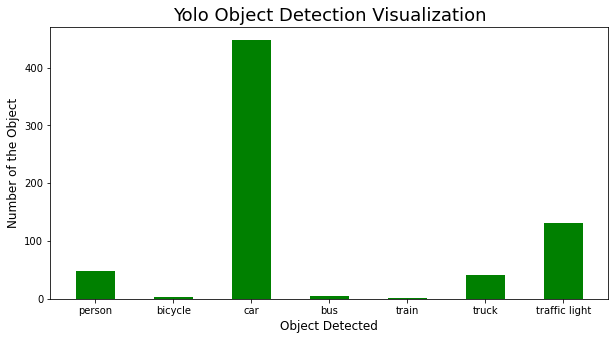

In [15]:
#bar graph representation
fig = plt.figure(figsize = (10, 5))
plt.bar(x=df2['Object'], height=df2['Number'],width=0.5,color='g')
plt.title('Yolo Object Detection Visualization', fontsize=18)
plt.xlabel('Object Detected',fontsize=12)
plt.ylabel('Number of the Object',fontsize=12)
plt.show()

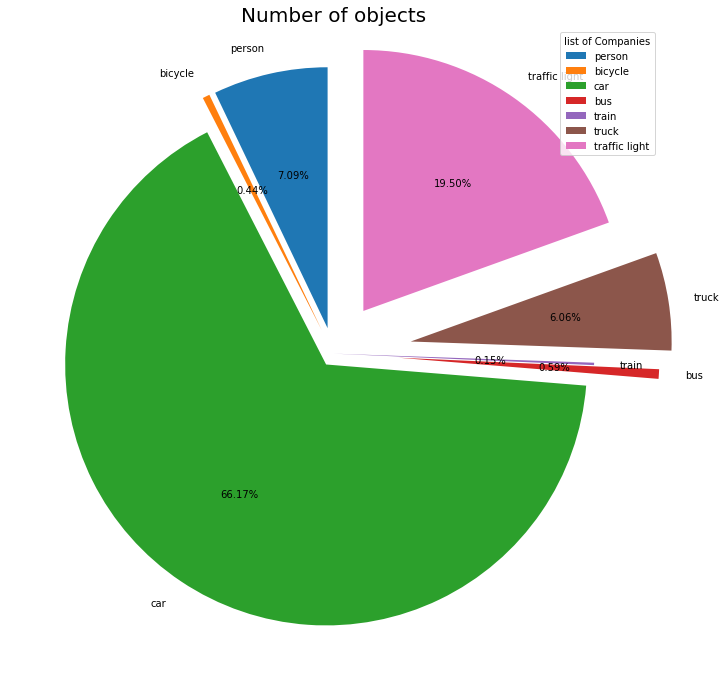

In [16]:
#visualizing in the pie chart
ex=[0.1,0.10,0.05,0.25,0,0.3,0.2]
fig = plt.figure(figsize=(12,12))     
plt.pie(df2['Number'],labels = df2['Object'],explode=ex,startangle=90,autopct = '%.2f%%')

plt.title('Number of objects', fontsize = 20)
plt.legend(title='list of Companies',loc=1)
plt.show()


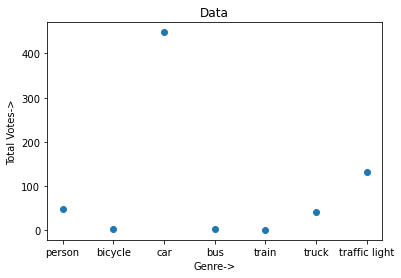

In [17]:
#Scatter Plot
plt.scatter(x=df2['Object'], y=df2['Number'])
plt.xlabel('Genre->')
plt.ylabel('Total Votes->')
plt.title('Data')
plt.show()

# Testing Code

In [29]:
img = cv2.imread("test/4.jpg")     #<--------- Write your filename here to test
height, width, channels = img.shape

key={}
with open("coco.names","r") as file:
    classes = [line.strip() for line in file.readlines()]
    for i in classes:
        key[i]=0

blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
yolo.setInput(blob)
outputs = yolo.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if (confidence > 0.5):
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

import sys,json
for i in range(len(boxes)):
    if i in indices:
        x, y, w, h = boxes[i]
        try:
            #print("The entry is")
            label =str(classes[class_ids[i]])

        except:
            print("Oops!No objects Were in the Image")
            break

        start = (x,y)
        end = (x+w,y+h)
        cv2.rectangle(img, start, end, (0,255,0), 4)
        cv2.putText(img, label+" "+str("{:.2f}".format(confidences[i])), (x,y-20), cv2.FONT_HERSHEY_PLAIN, 4, colorRed, 3)
        #print(label)
        for i in classes:
            if label==i:
                #print(label,i)
                key[label]=key[label]+1

total =0    
for i in classes:
    if key[i]>0:         #shows the object counts
        print(i+' : '+str(key[i]))
        total=total+key[i]
print("total objects : "+str(total))

car : 2
total objects : 2


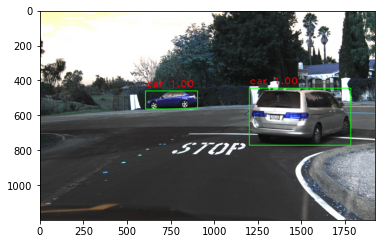

In [30]:
plt.imshow(img)

In [32]:
#cv2.imwrite("1.jpg",img)